<a href="https://colab.research.google.com/github/12Brainer/aa-oij-inec-integracion/blob/main/TP03_BrainerFallas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto Tecnológico de Costa Rica
**Escuela de Ingeniería en Computación (ITCR)**  
**Curso:** Aprendizaje Automático

## Tarea Programada 03 — Análisis de Agrupamientos (Clustering)

**Entrega:**  
A través del TEC-Digital. Un archivo `.zip` que contenga los datos procesados y un documento en formato **Jupyter Notebook** con todas las secciones solicitadas y código bien documentado.

Alumnos:

Brainer Fallas Prado

**Tecnología a utilizar:**  
**Python** y **scikit-learn**.

# 1) Introducción
En este trabajo se aplicarán conceptos básicos de análisis de agrupamientos o clustering para
caracterizar un fenómeno de impacto nacional.

**Objetivo:**  
El objetivo del presente ejercicio es utilizar datos de criminalidad en Costa Rica
combinados con datos socio-económicos asociados a distritos para demostrar cuán efectivos y
precisos pueden ser los algoritmos de clustering en la definición de perfiles de criminalidad por
distrito a nivel nacional.

## 1. Conjuntos de datos
Baje los siguientes conjuntos de datos, publicados por las siguientes instituciones
   nacionales, integre los datos por medio del nombre del distrito y pre-procéselos para el
   ejercicio (documente muy bien todo el proceso).  

   Para ambos conjuntos de datos baje los datos para todas las provincias, cantones y
   distritos y asegúrese que los datos están limpios antes de hacer el join por distrito para
   asegurarse que la mínima cantidad de datos no es tomada en cuenta. Es decir deben
   verificar que en ambos conjuntos de datos los distritos estén escritos de la misma
   forma.     

**Los conjuntos de datos:**

### a) Datos del OIJ

El **OIJ** publica datos sobre criminalidad en Costa Rica que tienen como fuente las denuncias interpuestas directamente ante esta entidad nacional.  

Los datos recopilados por el OIJ están disponibles por **provincia, cantón o distrito** (deben ser descargados como hoja electrónica para contar con el dato de distrito, ya que en otros formatos el archivo a veces presenta errores).  

- Los datos están disponibles en [2].  
- Utilice los datos del **2011**, ya que los datos de INEC corresponden a esa misma fecha.  

El conjunto de datos de criminalidad del OIJ posee las siguientes columnas:

- **Delito:** Tipo de Delito  
- **SubDelito:** Tipo de SubDelito  
- **Fecha:** Fecha del Hecho  
- **Hora:** Rango de 3 horas del Hecho  
- **Victima:** Descripción de la Víctima  
- **SubVictima:** Descripción de la SubVíctima  
- **Edad:** Grupo de Edad que pertenece la Víctima  
- **Genero:** Género de la Víctima  
- **Nacionalidad:** Nacionalidad de la Víctima  
- **Provincia:** Provincia del Lugar del Hecho  
- **Cantón:** Cantón del Lugar del Hecho  
- **Distrito:** Distrito del Lugar del Hecho  


In [ ]:
# Lectura de archivo .xls
import pandas as pd

# Leer todas las tablas dentro del archivo
tablas = pd.read_html("Estadisticas.xls")

# Revisar cuántas tablas hay
print(f"Se detectaron {len(tablas)} tablas en el archivo.")

# Tomar la primera tabla (usualmente es la que queremos)
estadisticas_df = tablas[0]

# Mostrar columnas
print("Columnas del archivo:\n", estadisticas_df.columns.tolist())

# Mostrar los primeros 10 registros
estadisticas_df.head(10)


Se detectaron 1 tablas en el archivo.
Columnas del archivo:
 ['Delito', 'SubDelito', 'Fecha', 'Hora', 'Victima', 'SubVictima', 'Edad', 'Sexo', 'Nacionalidad', 'Provincia', 'Canton', 'Distrito']


,Delito,SubDelito,Fecha,Hora,Victima,SubVictima,Edad,Sexo,Nacionalidad,Provincia,Canton,Distrito
0,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE DOMICILIO,2011-03-08,18:00:00 - 20:59:59,EDIFICACION,SUPER MERCADO,Mayor de edad,HOMBRE,COSTA RICA,LIMON,LIMON,LIMON
1,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE DOMICILIO,2011-03-31,06:00:00 - 08:59:59,VIVIENDA,NO APLICA,Mayor de edad,MUJER,COSTA RICA,LIMON,LIMON,LIMON
2,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE DOMICILIO,2011-05-31,18:00:00 - 20:59:59,VIVIENDA,NO APLICA,Mayor de edad,MUJER,COSTA RICA,HEREDIA,SAN RAFAEL,SAN JOSECITO
3,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE DOMICILIO,2011-08-13,12:00:00 - 14:59:59,VIVIENDA,NO APLICA,Mayor de edad,MUJER,COSTA RICA,SAN JOSE,SAN JOSE,HOSPITAL
4,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE DOMICILIO,2011-10-07,21:00:00 - 23:59:59,EDIFICACION,BODEGA/DEPOSITO/ALMACEN,Mayor de edad,HOMBRE,COSTA RICA,SAN JOSE,VASQUEZ DE CORONADO,CASCAJAL
5,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE DOMICILIO,2011-11-29,00:00:00 - 02:59:59,PERSONA,OTRO O INDETERMINADO,Mayor de edad,MUJER,COSTA RICA,SAN JOSE,SAN JOSE,HOSPITAL
6,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE SECRETOS,2011-04-13,00:00:00 - 02:59:59,PERSONA,OTRO O INDETERMINADO,Mayor de edad,MUJER,COSTA RICA,SAN JOSE,MONTES DE OCA,SAN PEDRO
7,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE SECRETOS,2011-07-14,18:00:00 - 20:59:59,PERSONA,OTRO O INDETERMINADO,Menor de edad,MUJER,COSTA RICA,SAN JOSE,GOICOECHEA,RANCHO REDONDO
8,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE SECRETOS,2011-07-02,18:00:00 - 20:59:59,PERSONA,OTRO O INDETERMINADO,Mayor de edad,MUJER,NICARAGUA,SAN JOSE,SAN JOSE,SAN SEBASTIAN
9,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE SECRETOS,2011-10-17,00:00:00 - 02:59:59,PERSONA,OTRO O INDETERMINADO,Mayor de edad,MUJER,COSTA RICA,SAN JOSE,SAN JOSE,MERCED


In [ ]:
# Revisión de tipos de datos por columna
print(estadisticas_df.dtypes)

Delito          object
SubDelito       object
Fecha           object
Hora            object
Victima         object
SubVictima      object
Edad            object
Sexo            object
Nacionalidad    object
Provincia       object
Canton          object
Distrito        object
dtype: object


In [ ]:
# Fuente de verdad sobe distritos según el Sistema Nacional de Información Territorila (Costa Rica)
# Archivo: distritos_2024.xlsx
# Al tratarse de un archivo xlsx, se usa como referencia la hoja "CUADRO_DISTRITO"
# Columna que contiene los distritos: DISTRITO
# Tomado de: https://files.snitcr.go.cr/boletines/DTA-TABLA%20POR%20PROVINCIA-CANT%C3%93N-DISTRITO%202024.pdf

# Se muestran los primeros registros del dataframe distritos_df
distritos_df = pd.read_excel("distritos_2024.xlsx", sheet_name="CUADRO_DISTRITO", header=6) # Se tomó la fila 7 como la fila con los encabeazados para las columnas

# Mostrando columnas
print("Columnas: ", distritos_df.columns.to_list())

# Se muestran todos los distritos de la columna respectiva
print(distritos_df["DISTRITO"])

Columnas:  ['Unnamed: 0', 'CÓDIGO CATALOGO', 'CÓDIGO PROVINCIA', 'PROVINCIA', 'CÓDIGO CANTÓN', 'CANTÓN', 'CÓDIGO DISTRITO', 'DISTRITO', 'ÁREA (km2)']
0           Carmen
1           Merced
2         Hospital
3         Catedral
4           Zapote
          ...     
487        Guácimo
488       Mercedes
489         Pocora
490    Río Jiménez
491        Duacarí
Name: DISTRITO, Length: 492, dtype: object


In [ ]:
!pip install unidecode

In [ ]:
# Normalización de columnas en ambos dataframes
# Se eliminan tildes, espacios y se unifican mayúsculas/minúsculas

import unidecode

estadisticas_df["DISTRITO_NORM"] = estadisticas_df["Distrito"].str.upper().str.strip().apply(unidecode.unidecode)
distritos_df["DISTRITO_NORM"] = distritos_df["DISTRITO"].str.upper().str.strip().apply(unidecode.unidecode)

# Se muestraan algunas filas de ambos dataframes, de la columna normalizada
print("Estadisticas:\n", estadisticas_df[["Distrito", "DISTRITO_NORM"]].head(10), "\n")
print("Fuente de verdad:\n", distritos_df[["DISTRITO", "DISTRITO_NORM"]].head(10))


Estadisticas:
          Distrito   DISTRITO_NORM
0           LIMON           LIMON
1           LIMON           LIMON
2    SAN JOSECITO    SAN JOSECITO
3        HOSPITAL        HOSPITAL
4        CASCAJAL        CASCAJAL
5        HOSPITAL        HOSPITAL
6       SAN PEDRO       SAN PEDRO
7  RANCHO REDONDO  RANCHO REDONDO
8   SAN SEBASTIAN   SAN SEBASTIAN
9          MERCED          MERCED 

Fuente de verdad:
                     DISTRITO              DISTRITO_NORM
0                     Carmen                     CARMEN
1                     Merced                     MERCED
2                   Hospital                   HOSPITAL
3                   Catedral                   CATEDRAL
4                     Zapote                     ZAPOTE
5  San Francisco de Dos Ríos  SAN FRANCISCO DE DOS RIOS
6                      Uruca                      URUCA
7               Mata Redonda               MATA REDONDA
8                      Pavas                      PAVAS
9                    Hatillo  

In [ ]:
# Mapeo de distritos inválidos en estadisticas_df con base en fuente de verdad (distritos_df)

invalidos = estadisticas_df.loc[
    ~estadisticas_df["DISTRITO_NORM"].isin(distritos_df["DISTRITO_NORM"]),
    "DISTRITO_NORM"
].unique()
print(invalidos)


['DESCONOCIDO' 'EL CHIRRIPO' 'MACACOMA' 'GENERAL' 'MATA PLATANO' 'FORTUNA'
 'MASTATE' 'HORQUETAS' 'SAN JOSE DE LA MONTA?A' 'ASUNCION' 'CORTES'
 'LA LEGUA' 'GRANJA' 'LOS ANGELES' 'TIGRA' 'MONTERRY' 'CAIRO' 'AGUA BUENA'
 'CEIBA' 'MERECEDES' 'TAPEZCO' 'SAN JOSE (PIZOTE)' 'PALMERA' 'UNION']


In [ ]:
!pip install rapidfuzz

In [ ]:
# Aplicación de algoritmo fuzzy match para 'rescatar' valores inválidos

from rapidfuzz import process

fuente_verdad = distritos_df["DISTRITO_NORM"].tolist()

def sugerir_match(distrito):
    match, score, _ = process.extractOne(distrito, fuente_verdad)
    return match if score >= 85 else None

estadisticas_df["DISTRITO_CORR"] = estadisticas_df["DISTRITO_NORM"].apply(sugerir_match)


In [ ]:
# Comprobacion de distritos rescatados por fuzzy match
rescatados = estadisticas_df.loc[
    estadisticas_df["DISTRITO_CORR"].notna() &
    (estadisticas_df["DISTRITO_CORR"] != estadisticas_df["DISTRITO_NORM"]),
    ["DISTRITO_NORM", "DISTRITO_CORR"]
]

print("Distritos rescatados por fuzzy match:")
print(rescatados)

Distritos rescatados por fuzzy match:
      DISTRITO_NORM    DISTRITO_CORR
64      EL CHIRRIPO         CHIRRIPO
69         MACACOMA         MACACONA
347         GENERAL       EL GENERAL
356    MATA PLATANO  MATA DE PLATANO
643         GENERAL       EL GENERAL
...             ...              ...
63807         TIGRA         LA TIGRA
63838        CORTES    PUERTO CORTES
63879       FORTUNA       LA FORTUNA
63887       PALMERA       LA PALMERA
63914       FORTUNA       LA FORTUNA

[1325 rows x 2 columns]


In [ ]:
# Verificar ahora los que siguen sin match en la columna corregida
invalidos_2 = estadisticas_df.loc[
    estadisticas_df["DISTRITO_CORR"].isna(),
    "DISTRITO_NORM"
].unique()

print("Distritos aún inválidos después del fuzzy match:")
print(invalidos_2)



Distritos aún inválidos después del fuzzy match:
['DESCONOCIDO']


In [ ]:
# Cálculo de porcentaje de resultados inválidos
# Sirve para determinar si eliminar dichos registros o no
# En este caso, hay 1016 registros con distrito "DESCONOCIDO" que no coincidieron con la fuente de verdad
# Si representan menos del 1–2% del total, muchas veces conviene descartarlos.

num_invalidos = estadisticas_df["DISTRITO_CORR"].isna().sum()
total = len(estadisticas_df)
print(f"Registros inválidos: {num_invalidos} / {total} ({num_invalidos/total*100:.2f}%)")


Registros inválidos: 1016 / 64136 (1.58%)


In [ ]:
# Eliminación de registros inválidos
estadisticas_df = estadisticas_df[estadisticas_df["DISTRITO_CORR"].notna()]
print(estadisticas_df.columns)

Index(['Delito', 'SubDelito', 'Fecha', 'Hora', 'Victima', 'SubVictima', 'Edad',
       'Sexo', 'Nacionalidad', 'Provincia', 'Canton', 'Distrito',
       'DISTRITO_NORM', 'DISTRITO_CORR'],
      dtype='object')


In [ ]:
# Renombrando y eliminando columnas que ya no aportan valor
estadisticas_df = estadisticas_df.drop(columns=["Distrito", "DISTRITO_NORM"])
estadisticas_df = estadisticas_df.rename(columns={"DISTRITO_CORR": "Distrito"})

print(estadisticas_df.columns)
print(estadisticas_df.shape)
print(estadisticas_df.head(10))

Index(['Delito', 'SubDelito', 'Fecha', 'Hora', 'Victima', 'SubVictima', 'Edad',
       'Sexo', 'Nacionalidad', 'Provincia', 'Canton', 'Distrito'],
      dtype='object')
(63120, 12)
                                     Delito               SubDelito  \
0  DELITOS CONTRA EL AMBITO DE LA INTIMIDAD  VIOLACION DE DOMICILIO   
1  DELITOS CONTRA EL AMBITO DE LA INTIMIDAD  VIOLACION DE DOMICILIO   
2  DELITOS CONTRA EL AMBITO DE LA INTIMIDAD  VIOLACION DE DOMICILIO   
3  DELITOS CONTRA EL AMBITO DE LA INTIMIDAD  VIOLACION DE DOMICILIO   
4  DELITOS CONTRA EL AMBITO DE LA INTIMIDAD  VIOLACION DE DOMICILIO   
5  DELITOS CONTRA EL AMBITO DE LA INTIMIDAD  VIOLACION DE DOMICILIO   
6  DELITOS CONTRA EL AMBITO DE LA INTIMIDAD   VIOLACION DE SECRETOS   
7  DELITOS CONTRA EL AMBITO DE LA INTIMIDAD   VIOLACION DE SECRETOS   
8  DELITOS CONTRA EL AMBITO DE LA INTIMIDAD   VIOLACION DE SECRETOS   
9  DELITOS CONTRA EL AMBITO DE LA INTIMIDAD   VIOLACION DE SECRETOS   

        Fecha                 Hora   

In [ ]:
# Revisión de nulos
print(estadisticas_df.isna().sum())


Delito          0
SubDelito       0
Fecha           0
Hora            0
Victima         0
SubVictima      0
Edad            0
Sexo            0
Nacionalidad    0
Provincia       0
Canton          0
Distrito        0
dtype: int64


### b) Datos del INEC
El INEC es la institución encargada a nivel nacional de la generación y divulgación
de datos estadísticos obtenidos por medio de censos, encuestas y otros estudios
sobre demografía, economía y otros. Al igual que en el OIJ los datos están
disponibles por distrito. Los datos a utilizar, fueron generados por el INEC como
resultado del censo realizado en el país en el año 2011. Los datos están
disponibles en [1].

El conjunto de datos posee las siguientes columnas:
- Provincia, Cantón y Distrito
- Población de 15 años y más
- Tasa neta de participación
- Tasa de ocupación
- Tasa de desempleo abierto
- Porcentaje de población económicamente inactiva
- Relación de dependencia económica

In [ ]:
# Al tratarse de un archivo xlsx, se usa como referencia la hoja "Cuadro 22"
# En este caso, la tabla viene bastante segmentada (es decir, encabezados multirow), por lo que hay que referenciar a varias filas para obtener un panorama completo de las columnas

# Primer pedazo
inec_df_1 = pd.read_excel("inec.xls", sheet_name="Cuadro 22", header=6) # Se tomó la fila 5 como la fila con una parte de los encabezados para las columnas
# Mostrando columnas
print("Columnas: ", inec_df_1.columns.to_list())

# Segundo pedazo
inec_df_2 = pd.read_excel("inec.xls", sheet_name="Cuadro 22", header=5) # Se tomó la fila 6 como la fila con una parte de los encabezados para las columnas

# Mostrando columnas
print("Columnas: ", inec_df_2.columns.to_list())

# # Se muestran registros para entender estructura actual
inec_df_2.head(10)

Columnas:  ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Sector \nPrimario', 'Sector \nSecundario', 'Sector Terciario']
Columnas:  ['Unnamed: 0', 'Provincia, cantón y distrito', 'Población de 15 años y más', 'Tasa neta de participación', 'Tasa de ocupación', 'Tasa de desempleo abierto', 'Porcentaje de población económicamente inactiva', 'Relación de dependencia económica', 'Porcentaje de población ocupada  ', 'Unnamed: 9', 'Unnamed: 10']


,Unnamed: 0,"Provincia, cantón y distrito",Población de 15 años y más,Tasa neta de participación,Tasa de ocupación,Tasa de desempleo abierto,Porcentaje de población económicamente inactiva,Relación de dependencia económica,Porcentaje de población ocupada,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sector \nPrimario,Sector \nSecundario,Sector Terciario
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Costa Rica,3233882.0,53.479688,51.660265,3.402083,46.520312,1.487301,13.855894,17.898795,68.245311
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,San José,1087315.0,56.023691,54.076326,3.475968,43.976309,1.305233,5.469744,17.294126,77.23613
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,San José,225856.0,56.708257,54.477189,3.934291,43.291743,1.249034,0.653446,18.906047,80.440507
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Carmen,2431.0,56.314274,54.792267,2.702703,43.685726,0.973703,1.576577,8.708709,89.714715
9,NaN,Merced,9655.0,59.243915,56.996375,3.793706,40.756085,1.142832,0.835908,18.262766,80.901327


In [ ]:
# Renombrando las ultimas columnas de acuerdo a la tabla del excel
inec_df_2.columns.values[-3:] = ['Sector Primario', 'Sector Secundario', 'Sector Terciario']

# Se muestran registros para entender estructura actual
inec_df_2.head(10)

,Unnamed: 0,"Provincia, cantón y distrito",Población de 15 años y más,Tasa neta de participación,Tasa de ocupación,Tasa de desempleo abierto,Porcentaje de población económicamente inactiva,Relación de dependencia económica,Sector Primario,Sector Secundario,Sector Terciario
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sector \nPrimario,Sector \nSecundario,Sector Terciario
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Costa Rica,3233882.0,53.479688,51.660265,3.402083,46.520312,1.487301,13.855894,17.898795,68.245311
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,San José,1087315.0,56.023691,54.076326,3.475968,43.976309,1.305233,5.469744,17.294126,77.23613
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,San José,225856.0,56.708257,54.477189,3.934291,43.291743,1.249034,0.653446,18.906047,80.440507
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Carmen,2431.0,56.314274,54.792267,2.702703,43.685726,0.973703,1.576577,8.708709,89.714715
9,NaN,Merced,9655.0,59.243915,56.996375,3.793706,40.756085,1.142832,0.835908,18.262766,80.901327


In [ ]:
# Se elimina el resto de columnas unnamed restantes
inec_df_2 = inec_df_2.loc[:, ~inec_df_2.columns.str.contains("Unnamed")]

# Asignación a inec_df
inec_df = inec_df_2.copy()

# Se renombra la primer columna a "Distrito" para efectos de preprocesamiento
inec_df = inec_df.rename(columns={inec_df.columns[0]: "Distrito"})


# Se muestran registros para entender estructura actual
inec_df.head(10)


,Distrito,Población de 15 años y más,Tasa neta de participación,Tasa de ocupación,Tasa de desempleo abierto,Porcentaje de población económicamente inactiva,Relación de dependencia económica,Sector Primario,Sector Secundario,Sector Terciario
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sector \nPrimario,Sector \nSecundario,Sector Terciario
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Costa Rica,3233882.0,53.479688,51.660265,3.402083,46.520312,1.487301,13.855894,17.898795,68.245311
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,San José,1087315.0,56.023691,54.076326,3.475968,43.976309,1.305233,5.469744,17.294126,77.23613
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,San José,225856.0,56.708257,54.477189,3.934291,43.291743,1.249034,0.653446,18.906047,80.440507
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Carmen,2431.0,56.314274,54.792267,2.702703,43.685726,0.973703,1.576577,8.708709,89.714715
9,Merced,9655.0,59.243915,56.996375,3.793706,40.756085,1.142832,0.835908,18.262766,80.901327


In [ ]:
# Nuevamente, se usará la fuente de verdad anterior para normalizar distritos

# Normalización de columnas en ambos dataframes
# Se eliminan tildes, espacios y se unifican mayúsculas/minúsculas

# Normalización segura convirtiendo todo a string
inec_df["DISTRITO_NORM"] = inec_df["Distrito"].astype(str).str.upper().str.strip().apply(unidecode.unidecode)
distritos_df["DISTRITO_NORM"] = distritos_df["DISTRITO"].astype(str).str.upper().str.strip().apply(unidecode.unidecode)

# Mostrar algunas filas
print("INEC:\n", inec_df[["Distrito", "DISTRITO_NORM"]].head(10), "\n")
print("Fuente de verdad:\n", distritos_df[["DISTRITO", "DISTRITO_NORM"]].head(10))



INEC:
             Distrito DISTRITO_NORM
0                NaN           NAN
1                NaN           NAN
2        Costa Rica     COSTA RICA
3                NaN           NAN
4           San José      SAN JOSE
5                NaN           NAN
6           San José      SAN JOSE
7                NaN           NAN
8  Carmen                   CARMEN
9    Merced                 MERCED 

Fuente de verdad:
                     DISTRITO              DISTRITO_NORM
0                     Carmen                     CARMEN
1                     Merced                     MERCED
2                   Hospital                   HOSPITAL
3                   Catedral                   CATEDRAL
4                     Zapote                     ZAPOTE
5  San Francisco de Dos Ríos  SAN FRANCISCO DE DOS RIOS
6                      Uruca                      URUCA
7               Mata Redonda               MATA REDONDA
8                      Pavas                      PAVAS
9                    Hatill

In [ ]:
# Mapeo de distritos inválidos en inec_df con base en fuente de verdad (distritos_df)

invalidos = inec_df.loc[
    ~inec_df["DISTRITO_NORM"].isin(distritos_df["DISTRITO_NORM"]),
    "DISTRITO_NORM"
].unique()

print(invalidos)


['NAN' 'COSTA RICA' 'PURISCAL' 'TARRAZU' 'MORA' 'GOICOECHEA'
 'VAZQUEZ DE CORONADO' 'ACOSTA' 'TIBAS' 'MORAVIA' 'MONTES DE OCA'
 'TURRUBARES' 'DOTA' 'PEREZ ZELEDON' 'LEON CORTES CASTRO' 'POAS'
 'VALVERDE VEGA' 'GUATUSO' 'CARTAGO' 'ALVARADO' 'OREAMUNO' 'EL GUARCO'
 'FLORES' 'GUANACASTE' 'CARRILLO' 'ABANGARES' 'NANDAYURE' 'MONTE VERDE'
 'ESPARZA' 'MONTES DE ORO' 'OSA' 'AGUIRRE' 'COTO BRUS' 'CORREDORES'
 'GARABITO' 'POCOCI' 'TALAMANCA']


In [ ]:
# Aplicación de algoritmo fuzzy match para 'rescatar' valores inválidos

from rapidfuzz import process

fuente_verdad = inec_df["DISTRITO_NORM"].tolist()

def sugerir_match(distrito):
    match, score, _ = process.extractOne(distrito, fuente_verdad)
    return match if score >= 85 else None

inec_df["DISTRITO_CORR"] = inec_df["DISTRITO_NORM"].apply(sugerir_match)

In [ ]:
# Comprobacion de distritos rescatados por fuzzy match
rescatados = inec_df.loc[
    inec_df["DISTRITO_CORR"].notna() &
    (inec_df["DISTRITO_CORR"] != inec_df["DISTRITO_NORM"]),
    ["DISTRITO_NORM", "DISTRITO_CORR"]
]

print("Distritos rescatados por fuzzy match:")
print(rescatados)

Distritos rescatados por fuzzy match:
Empty DataFrame
Columns: [DISTRITO_NORM, DISTRITO_CORR]
Index: []


In [ ]:
# No hubieron registros rescatables

# Cálculo de porcentaje de resultados inválidos
# Sirve para determinar si eliminar dichos registros o no
# En este caso, se hacen los cálculos con base en los registros inválidos

# Número de registros inválidos
num_invalidos = inec_df["DISTRITO_NORM"].isin(invalidos).sum()

# Total de registros
total = len(inec_df)

# Porcentaje
porcentaje = (num_invalidos / total) * 100

print(f"Registros inválidos: {num_invalidos} / {total} ({porcentaje:.2f}%)")




Registros inválidos: 208 / 732 (28.42%)


In [ ]:
# Se eliminan los registros con valores inválidos en la columna Distrito, ya que no aportan información
# Filtrar solo los registros válidos
inec_df = inec_df[~inec_df["DISTRITO_NORM"].isin(invalidos)].reset_index(drop=True)

# Verificar
num_restantes = len(inec_df)
print(f"Registros restantes: {num_restantes}")


Registros restantes: 524


In [ ]:
# Renombrando y eliminando columnas que ya no aportan valor
inec_df = inec_df.drop(columns=["Distrito", "DISTRITO_NORM"])
inec_df = inec_df.rename(columns={"DISTRITO_CORR": "Distrito"})

print(inec_df.columns)
print(inec_df.shape)

# Mostramos nuevamente algunos registros de inec_df
inec_df.head(5)

Index(['Población de 15 años y más', 'Tasa neta de participación',
       'Tasa de ocupación', 'Tasa de desempleo abierto',
       'Porcentaje de población económicamente inactiva',
       'Relación de dependencia económica', 'Sector Primario',
       'Sector Secundario', 'Sector Terciario', 'Distrito'],
      dtype='object')
(524, 10)


,Población de 15 años y más,Tasa neta de participación,Tasa de ocupación,Tasa de desempleo abierto,Porcentaje de población económicamente inactiva,Relación de dependencia económica,Sector Primario,Sector Secundario,Sector Terciario,Distrito
0,1087315.0,56.023691,54.076326,3.475968,43.976309,1.305233,5.469744,17.294126,77.23613,SAN JOSE
1,225856.0,56.708257,54.477189,3.934291,43.291743,1.249034,0.653446,18.906047,80.440507,SAN JOSE
2,2431.0,56.314274,54.792267,2.702703,43.685726,0.973703,1.576577,8.708709,89.714715,CARMEN
3,9655.0,59.243915,56.996375,3.793706,40.756085,1.142832,0.835908,18.262766,80.901327,MERCED
4,15096.0,56.425543,53.928193,4.425922,43.574457,1.262268,0.466773,18.621791,80.911436,HOSPITAL


In [ ]:
# Revisión de tipos
print(inec_df.dtypes)

Población de 15 años y más                         float64
Tasa neta de participación                         float64
Tasa de ocupación                                  float64
Tasa de desempleo abierto                           object
Porcentaje de población económicamente inactiva    float64
Relación de dependencia económica                  float64
Sector Primario                                     object
Sector Secundario                                   object
Sector Terciario                                    object
Distrito                                            object
dtype: object


In [ ]:
# Trasnformar todas las columnas a tipo float, ya que son numéricas (excepto Distrito)

# Separar la columna 'Distrito'
distritos = inec_df["Distrito"]

# Columnas numéricas
columnas_numericas = inec_df.columns.drop("Distrito")

# Convertir solo columnas numéricas a float
inec_df[columnas_numericas] = inec_df[columnas_numericas].apply(pd.to_numeric, errors="coerce")

# Reintegrar la columna 'Distrito'
inec_df["Distrito"] = distritos

# Verificar tipos
print(inec_df.dtypes)


Población de 15 años y más                         float64
Tasa neta de participación                         float64
Tasa de ocupación                                  float64
Tasa de desempleo abierto                          float64
Porcentaje de población económicamente inactiva    float64
Relación de dependencia económica                  float64
Sector Primario                                    float64
Sector Secundario                                  float64
Sector Terciario                                   float64
Distrito                                            object
dtype: object


In [ ]:
!pip install scikit-learn

In [ ]:
# Aplicación de rescaling usando MinMax de scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Inicializar scaler
scaler = MinMaxScaler()

# Columnas numéricas a escalar (todas menos 'Distrito')
columnas_numericas = inec_df.columns.drop("Distrito")

# Aplicar MinMax scaling
inec_df[columnas_numericas] = scaler.fit_transform(inec_df[columnas_numericas])

# Verificar
inec_df.head()

,Población de 15 años y más,Tasa neta de participación,Tasa de ocupación,Tasa de desempleo abierto,Porcentaje de población económicamente inactiva,Relación de dependencia económica,Sector Primario,Sector Secundario,Sector Terciario,Distrito
0,1.000000,0.717029,0.704770,0.389596,0.282971,0.145470,0.060066,0.445102,0.840697,SAN JOSE
1,0.207567,0.736805,0.716622,0.443974,0.263195,0.124807,0.004117,0.489560,0.881605,SAN JOSE
2,0.002044,0.725423,0.725937,0.297850,0.274577,0.023577,0.014840,0.208308,1.000000,CARMEN
3,0.008689,0.810054,0.791102,0.427294,0.189946,0.085761,0.006236,0.471818,0.887488,MERCED
4,0.013694,0.728638,0.700391,0.502304,0.271362,0.129673,0.001948,0.481720,0.887617,HOSPITAL


In [ ]:
# Revisión de nulos
print(inec_df.isna().sum())


Población de 15 años y más                         0
Tasa neta de participación                         0
Tasa de ocupación                                  0
Tasa de desempleo abierto                          1
Porcentaje de población económicamente inactiva    0
Relación de dependencia económica                  0
Sector Primario                                    0
Sector Secundario                                  0
Sector Terciario                                   0
Distrito                                           0
dtype: int64


In [ ]:
# Dato que hay evidencia de valores nulos en Tasa de Desempleo Abierto, se procede a plicar un método de imputación
# Técnica de imputación a aplicar: Media de la columna
inec_df["Tasa de desempleo abierto"] = inec_df["Tasa de desempleo abierto"].fillna(
    inec_df["Tasa de desempleo abierto"].mean()
)

# Verificación de nulos nuevamente
print(inec_df.isna().sum())

Población de 15 años y más                         0
Tasa neta de participación                         0
Tasa de ocupación                                  0
Tasa de desempleo abierto                          0
Porcentaje de población económicamente inactiva    0
Relación de dependencia económica                  0
Sector Primario                                    0
Sector Secundario                                  0
Sector Terciario                                   0
Distrito                                           0
dtype: int64


In [ ]:
# Merge de ambos DataFrames por la columna "Distrito"
df = pd.merge(
    estadisticas_df,
    inec_df,
    on="Distrito",
    how="inner"   # solo se quedan los distritos que existen en ambos
)

# Verificar el resultado
print(df.shape)
df.to_csv("df.csv", index=False, encoding="utf-8")
df.head()


(146266, 21)


,Delito,SubDelito,Fecha,Hora,Victima,SubVictima,Edad,Sexo,Nacionalidad,Provincia,...,Distrito,Población de 15 años y más,Tasa neta de participación,Tasa de ocupación,Tasa de desempleo abierto,Porcentaje de población económicamente inactiva,Relación de dependencia económica,Sector Primario,Sector Secundario,Sector Terciario
0,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE DOMICILIO,2011-03-08,18:00:00 - 20:59:59,EDIFICACION,SUPER MERCADO,Mayor de edad,HOMBRE,COSTA RICA,LIMON,...,LIMON,0.248318,0.555877,0.532976,0.489795,0.444123,0.341612,0.439890,0.282118,0.498731
1,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE DOMICILIO,2011-03-08,18:00:00 - 20:59:59,EDIFICACION,SUPER MERCADO,Mayor de edad,HOMBRE,COSTA RICA,LIMON,...,LIMON,0.060110,0.510123,0.477434,0.577992,0.489877,0.381652,0.196931,0.335721,0.740919
2,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE DOMICILIO,2011-03-08,18:00:00 - 20:59:59,EDIFICACION,SUPER MERCADO,Mayor de edad,HOMBRE,COSTA RICA,LIMON,...,LIMON,0.040066,0.567276,0.529365,0.606411,0.432724,0.307088,0.041901,0.362913,0.898702
3,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE DOMICILIO,2011-03-31,06:00:00 - 08:59:59,VIVIENDA,NO APLICA,Mayor de edad,MUJER,COSTA RICA,LIMON,...,LIMON,0.248318,0.555877,0.532976,0.489795,0.444123,0.341612,0.439890,0.282118,0.498731
4,DELITOS CONTRA EL AMBITO DE LA INTIMIDAD,VIOLACION DE DOMICILIO,2011-03-31,06:00:00 - 08:59:59,VIVIENDA,NO APLICA,Mayor de edad,MUJER,COSTA RICA,LIMON,...,LIMON,0.060110,0.510123,0.477434,0.577992,0.489877,0.381652,0.196931,0.335721,0.740919


## 2. Selección características
Seleccione las variables a utilizar en el ejercicio (al menos seis variables que incluyan la
cantidad de delitos por distrito, dato que debe calcular). Documente el motivo de la
selección de acuerdo al problema en estudio.

count    146266.000000
mean       5280.884389
std        6703.601638
min           1.000000
25%         898.000000
50%        2334.000000
75%        5790.000000
max       20696.000000
Name: Cantidad_Delitos, dtype: float64


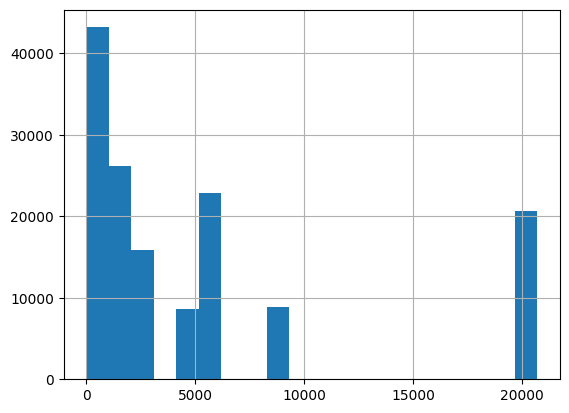

In [ ]:
# Cantidad de delitos por distrito
df["Cantidad_Delitos"] = df.groupby("Distrito")["Delito"].transform("count")
delitos_por_distrito = df["Cantidad_Delitos"]

# Revisar estadísticas
print(delitos_por_distrito.describe())

# Histograma
import matplotlib.pyplot as plt
delitos_por_distrito.hist(bins=20)
plt.show()

In [ ]:
"""
Total de registros: 146,266 (cada fila es un delito).

Promedio de delitos por distrito: ~5,281.

Desviación estándar: 6,704 → hay mucha variabilidad entre distritos.
"""



'\nTotal de registros: 146,266 (cada fila es un delito).\n\nPromedio de delitos por distrito: ~5,281.\n\nDesviación estándar: 6,704 → hay mucha variabilidad entre distritos.\n'

In [ ]:
!pip install seaborn

In [ ]:
"""
Selección automática de features para clustering:

1. Tomar todas las columnas numéricas del DataFrame como candidatas.
2. Eliminar columnas con valores nulos, ya que pueden afectar el desempeño del clustering.
3. Filtrar columnas con desviación estándar muy baja (std <= 0.01), porque aportan poca información diferenciadora.
4. Revisar la correlación entre columnas restantes; si dos columnas tienen correlación mayor a 0.9, eliminar una para reducir redundancia.
5. Devolver la lista final de features que cumplen todos los criterios, lista para aplicar algoritmos de clustering.
"""


import pandas as pd
import numpy as np

# Seleccionar automáticamente todas las columnas numéricas como candidatas
candidate_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Filtrar por nulos y desviación estándar mínima
filtered = []
for f in candidate_features:
    if df[f].isna().sum() == 0 and df[f].std() > 0.01:
        filtered.append(f)

#  Filtrar redundancia por correlación
final_features = filtered.copy()
corr_matrix = df[filtered].corr().abs()

for i, f1 in enumerate(filtered):
    for j, f2 in enumerate(filtered):
        if i >= j:
            continue
        if corr_matrix.loc[f1, f2] > 0.9 and f2 in final_features:
            final_features.remove(f2)

final_features.append("Cantidad_Delitos")
print("Features seleccionadas automáticamente para clustering:")
print(final_features)


Features seleccionadas automáticamente para clustering:
['Población de 15 años y más', 'Tasa neta de participación', 'Tasa de desempleo abierto', 'Sector Primario', 'Sector Secundario', 'Cantidad_Delitos', 'Cantidad_Delitos']


## 3. K-Means
Utilice el algoritmo K-Means para caracterizar los datos usando las variables
seleccionadas.


In [ ]:
from sklearn.cluster import KMeans

# Crear un DataFrame solo con las features seleccionadas
X = df[final_features].copy()

# Aplicar K-Means
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Agregar los clusters al DataFrame original
df['Cluster'] = clusters

# Revisar resultados
df[['Distrito', 'Cluster'] + final_features].head()


,Distrito,Cluster,Población de 15 años y más,Tasa neta de participación,Tasa de desempleo abierto,Sector Primario,Sector Secundario,Cantidad_Delitos,Cantidad_Delitos
0,LIMON,0,0.248318,0.555877,0.489795,0.439890,0.282118,5517,5517
1,LIMON,0,0.060110,0.510123,0.577992,0.196931,0.335721,5517,5517
2,LIMON,0,0.040066,0.567276,0.606411,0.041901,0.362913,5517,5517
3,LIMON,0,0.248318,0.555877,0.489795,0.439890,0.282118,5517,5517
4,LIMON,0,0.060110,0.510123,0.577992,0.196931,0.335721,5517,5517


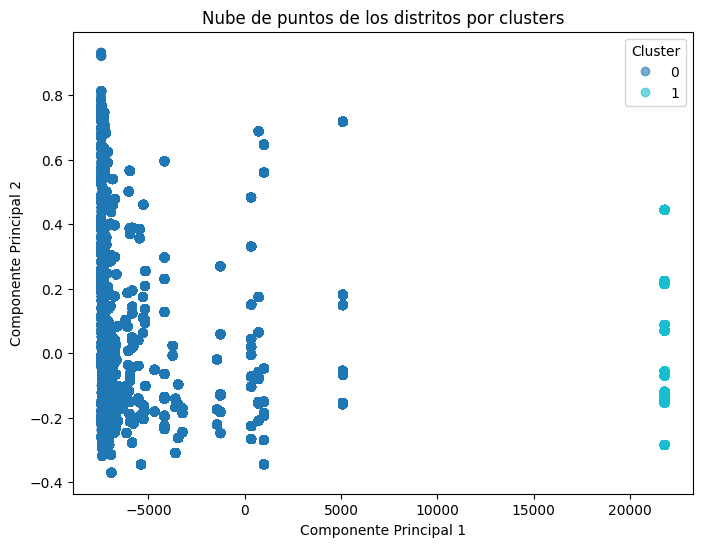

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Crear DataFrame con features seleccionadas
X = df[final_features].copy()

# Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear figura de dispersión coloreada por clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='tab10', alpha=0.6)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Nube de puntos de los distritos por clusters')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()


## 4. Método del Codo
Utilice el método del codo para seleccionar el mejor K y vuelva a ejecutar el algoritmo
usando el K recomendado.


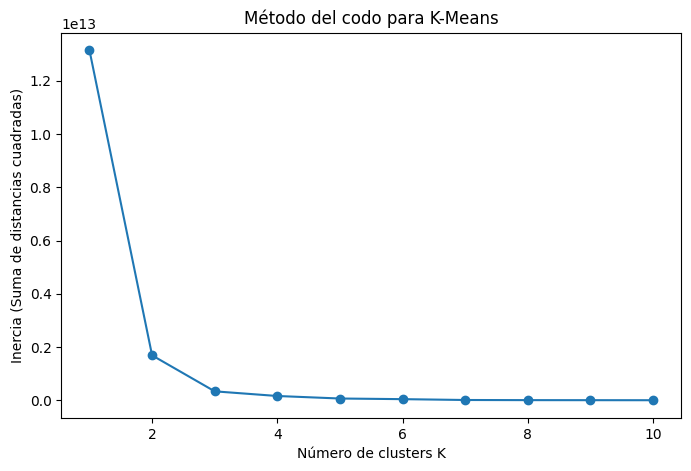

In [ ]:
"""
Encontrar el número óptimo de clusters (K) y luego ejecutar K-Means con ese valor
"""

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Crear DataFrame con features seleccionadas
X = df[final_features].copy()

# Calcular inercia (suma de distancias al cuadrado dentro de los clusters) para varios K
inertia = []
k_values = range(1, 11)  # prueba K de 1 a 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters K')
plt.ylabel('Inercia (Suma de distancias cuadradas)')
plt.title('Método del codo para K-Means')
plt.show()


In [ ]:
# El K recomendado por el codo es 4
k_optimo = 4

kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Revisar resultados
df[['Distrito', 'Cluster'] + final_features].head()


,Distrito,Cluster,Población de 15 años y más,Tasa neta de participación,Tasa de desempleo abierto,Sector Primario,Sector Secundario,Cantidad_Delitos,Cantidad_Delitos
0,LIMON,3,0.248318,0.555877,0.489795,0.439890,0.282118,5517,5517
1,LIMON,3,0.060110,0.510123,0.577992,0.196931,0.335721,5517,5517
2,LIMON,3,0.040066,0.567276,0.606411,0.041901,0.362913,5517,5517
3,LIMON,3,0.248318,0.555877,0.489795,0.439890,0.282118,5517,5517
4,LIMON,3,0.060110,0.510123,0.577992,0.196931,0.335721,5517,5517


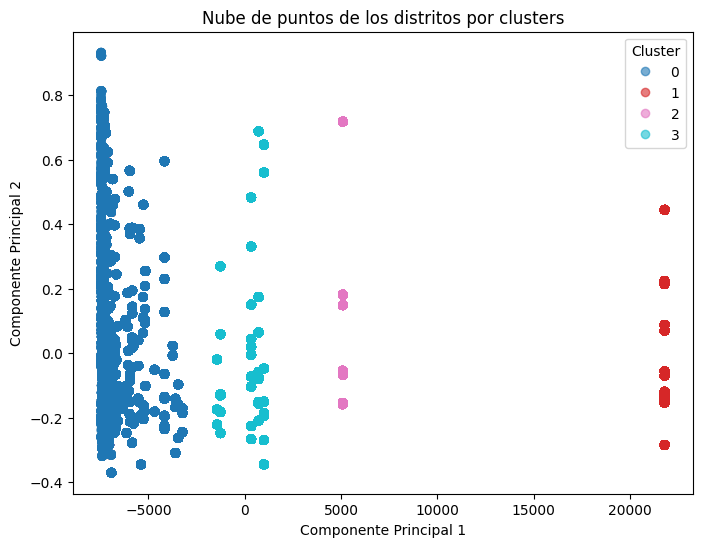

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Crear DataFrame con features seleccionadas
X = df[final_features].copy()

# Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear figura de dispersión coloreada por clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='tab10', alpha=0.6)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Nube de puntos de los distritos por clusters')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()


## 5. DBSCAN
Aplique a los datos el algoritmo de clustering DBSCAN, debe ajustar los parámetros al
conjunto de datos. Explique el proceso de ajuste de parámetros.

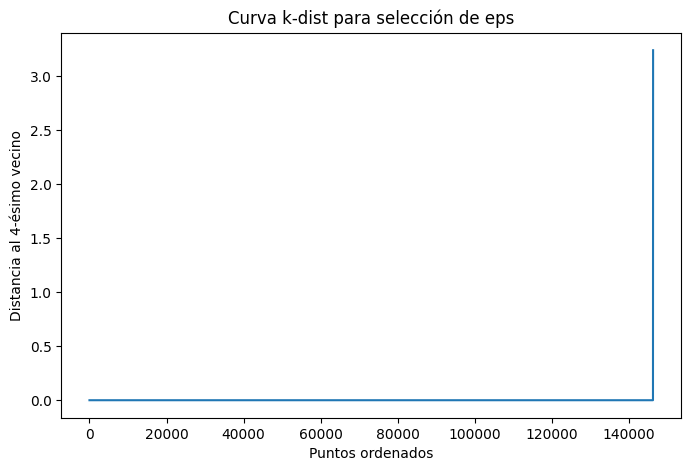

DBSCAN_Cluster
3      29824
30      9810
70      4776
18      2719
111     2638
       ...  
236        5
247        5
249        5
250        5
251        4
Name: count, Length: 253, dtype: int64


In [ ]:
"""
Determinar un rango inicial para eps (epsilon):
Para encontrar un buen valor, se usa la técnica del k-dist plot:

- Se calculas las distancias a los k vecinos más cercanos (usualmente k = min_samples).
- Se ordenan esas distancias
- Se graican las distancias


El punto donde la curva empieza a crecer bruscamente es un buen valor para eps.
"""

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Escalar datos
X = df[final_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Graficar curva k-dist para elegir eps
k = 4  # regla: 2 * número de features (ajustable)
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenar y graficar distancias al vecino k
distances = np.sort(distances[:, k-1])
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("Puntos ordenados")
plt.ylabel(f"Distancia al {k}-ésimo vecino")
plt.title("Curva k-dist para selección de eps")
plt.show()

# Ajustar DBSCAN usando eps estimado visualmente
dbscan = DBSCAN(eps=0.6, min_samples=k)
clusters = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = clusters

print(df['DBSCAN_Cluster'].value_counts())


## 6. Coeficiente de Silhouette
Aplique el coeficiente de la Silhouette para evaluar los modelos de clustering resultantes

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(X, kmeans.labels_)
silhouette_dbscan = silhouette_score(X, dbscan.labels_)

print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")

## 7. Conclusiones
Documente sus conclusiones, realice comparación de resultados por algoritmo (incluya al
menos cuatro conclusiones importantes).

1. En la primer ejecución de K-means, los clusters reflejan similitudes entre filas individuales de datos dentro de un mismo distrito, pero no resumen el distrito completo. Por eso vemos muchas filas de LIMON repetidas en el mismo cluster.

2. Al utilizar un valor K óptimo (obtenido con método del codo), se logra una mejor identificación de los clusters (clusters más representativos), ya que dicho valor K marca una convergencia (inercia menos pronunciada).

3. Al aplicar DBSCAN, existe una separación clara entre las zonas densas (clusters) y las zonas dispersas (ruido).

4. DBSCAN puede segmentar bien los datos y, probablemente, detectará algunos puntos como ruido fuera de los clusters, debido al valor óptimo de eps se encuentra justo en el “codo” de la curva.

## 8. Problema y objetivo
Describa el problema y el objetivo del ejercicio


### Problema:
A partir de los distritos, existen datos sobre criminalidad y características socioeconómicas, pero no se cuenta con una clasificación previa que permita identificar patrones o segmentar las zonas según su nivel de incidencia delictiva.

### Objetivo:
Usando los distritos como unidad de análisis, aplicar técnicas de clustering para identificar grupos de distritos con comportamientos similares en criminalidad, facilitando el análisis y la toma de decisiones en materia de seguridad pública.

##9. Describa y cite los datos utilizados.
- Del Instituto Nacional de Estadisticas y Censos, se utilizó un archivo en formato excel para construir un dataframe que contenía atributos principalmente numéricas.
- Del OIJ, se usaron estadísticas de criminalidad, con datos categóricos en su mayoría.
- Se utilizó un reporte del 2024 del SNIT para obtener una fuente de verdad sobre los distritos existentes en Costa Rica

## 11. Fuentes (APA)
Instituto Nacional de Estadísticas y Censos. (2011). Censo 2011: Indicadores económicos, según provincia, cantón y distrito. Recuperado de https://admin.inec.cr/sites/default/files/media/reempleocenso2011-22.xls_2.xls

Organismo de Investigación Judicial. (2018). Estadísticas policiales. Recuperado de https://sitiooij.poder-judicial.go.cr/index.php/apertura/transparencia/estadisticas-policiales

Sistema Nacional de Información Territorial. (2024). DTA-TABLA POR PROVINCIA-CANTÓN-DISTRITO 2024. Recuperado de https://files.snitcr.go.cr/boletines/DTA-TABLA%20POR%20PROVINCIA-CANT%C3%93N-DISTRITO%202024.xlsx

# Algoritmo BIRCH

# **Algoritmo BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)**

---

## **1️⃣ Objetivo de BIRCH**

* **Clustering eficiente** de grandes volúmenes de datos (numerosidad vs dimensionalidad).
* Crea **micro-clusters** como resumen de los datos antes de generar los **clusters finales**.
* Ideal para datasets **grandes** o **en streaming**.



---

## **2️⃣ Conceptos clave**

| Concepto                       | Definición                                                                                                                            |
| ------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------- |
| **CF (Clustering Feature)**    | Triple $(N, LS, SS)$ que resume un micro-cluster: <br>• $N$ = número de puntos <br>• $LS$ = suma de vectores <br>• $SS$ = suma de cuadrados |
| **Micro-cluster**              | Subgrupo compacto de puntos cercanos, resumido por un CF                                                                              |
| **Centroide de micro-cluster** | $c = \frac{LS}{N}$                                                                                                                          |
| **Radio del micro-cluster**    | $r = \sqrt{\frac{SS}{N} - \left(\frac{LS}{N}\right)^2}$                                                                                                      |
| **Threshold $T$**              | Máximo radio permitido para un micro-cluster. Si se excede → se crea un nuevo micro-cluster                                           |


## Preparación
Se recomienda **escalar** las variables antes de aplicar BIRCH:

- **Z-score:**  
  $ z = \dfrac{x-\mu}{\sigma} $
- **Min-Max:**  
  $ x' = \dfrac{x-\min}{\max - \min} $


## Cómo elegir el valor T (threshold o umbral)
* **Distancias naturales de los datos:** usar promedio o mediana de distancias entre puntos cercanos.
* **Escala de las características:** normalizar o estandarizar antes de fijar $T$.
* **Número esperado de micro-clusters:** ajustar $T$ para obtener ni demasiados ni muy pocos clusters.
* **Prueba iterativa:** variar $T$ y observar la estructura resultante.
* **Regla práctica:** 1–5% del rango total de los datos por dimensión.





## Parámetros del CF-Tree

- **Branching factor (B):** máximo de entradas por nodo interno  
- **Leaf size (L):** máximo de entradas por nodo hoja  
- **Threshold (T):** radio máximo permitido en cada entrada de hoja

**Idea:**  
- Insertar cada punto en el nodo/entrada más cercana.  
- Si el radio excede $T$, se crea nueva entrada.  
- Si la hoja excede $L$, se divide (split).  

---
---

## **3️⃣ Fases del algoritmo BIRCH**

### **Fase 1: Construcción del CF Tree**

* Se insertan los puntos **uno por uno** en el CF Tree.
* Para cada punto:

  1. Buscar micro-cluster más cercano.
  2. Calcular nueva distancia/radio si se agrega el punto.
  3. Si el radio $\le T$ → agregar al micro-cluster.
  4. Si el radio $> T$ → crear un nuevo micro-cluster.
* Resultado: **micro-clusters que resumen los datos**.



---

### **Fase 2: Condensación (opcional)**

* Combinar micro-clusters muy cercanos para reducir la complejidad.
* Resultado: menos micro-clusters, pero sigue representando los datos correctamente.

---

### **Fase 3: Clustering global**

* Se aplica un algoritmo clásico (k-means, k-medoids) **sobre los micro-clusters**, no sobre los puntos individuales.
* Esto es mucho más rápido y eficiente.

---

### **Fase 4: Asignación final**

* Cada punto original se asigna al **cluster final** según su micro-cluster.
* Permite reconstruir la clasificación completa.

---

## **4️⃣ Ejemplo de creación CF Tree (en papel) ***
En este ejercicio, agrupamos las provincias según **Población** y **Superficie** usando **micro-clusters** con un **umbral**:  

$$
T = 300
$$

La distancia entre dos puntos $(x_1, y_1)$ y $(x_2, y_2)$ se calcula mediante la **fórmula euclidiana**:

$$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

---

## **Datos iniciales**

| Provincia | Población (miles) | Superficie (km²) |
|----------|--------------------|------------------|
| A        | 300               | 400              |
| B        | 320               | 410              |
| C        | 1000              | 1200             |
| D        | 950               | 1150             |
| E        | 310               | 420              |
| F        | 980               | 1180             |

---

## **Paso 1 — Primer micro-cluster**

Tomamos **Provincia A** como primer punto:

$$
\mathbf{C_1} = \{A\} \quad\quad C_1 = (300,\ 400)
$$

---

## **Paso 2 — Evaluar Provincia B**

Calculamos distancia a $C_1$:

$$
\begin{aligned}
d_{B,C_1} &= \sqrt{(320 - 300)^2 + (410 - 400)^2} \\
&= \sqrt{20^2 + 10^2} \\
&= \sqrt{500} \approx 22.36
\end{aligned}
$$

Como $d_{B,C_1} < T$, agregamos B a $C_1$:

$$
C_1 = \{A,\ B\}
$$

Nuevo centroide $C_1$:

$$
C_1 = \left(
\frac{300 + 320}{2},
\frac{400 + 410}{2}
\right) = (310,\ 405)
$$

---

## **Paso 3 — Evaluar Provincia C**

Distancia a $C_1$:

$$
\begin{aligned}
d_{C,C_1} &= \sqrt{(1000 - 310)^2 + (1200 - 405)^2} \\
&= \sqrt{690^2 + 795^2} \\
&= \sqrt{476100 + 632025} \\
&= \sqrt{1,108,125} \approx 1052.20
\end{aligned}
$$

Como $d_{C,C_1} > T$, creamos un **nuevo micro-cluster**:

$$
\mathbf{C_2} = \{C\} \quad\quad C_2 = (1000,\ 1200)
$$

---

## **Paso 4 — Evaluar Provincia D**

Distancia a $C_2$:

$$
\begin{aligned}
d_{D,C_2} &= \sqrt{(950 - 1000)^2 + (1150 - 1200)^2} \\
&= \sqrt{(-50)^2 + (-50)^2} \\
&= \sqrt{2500 + 2500} \\
&= \sqrt{5000} \approx 70.71
\end{aligned}
$$

Como $d_{D,C_2} < T$, agregamos D a $C_2$:

$$
C_2 = \{C,\ D\}
$$

Nuevo centroide $C_2$:

$$
C_2 = \left(
\frac{1000 + 950}{2},
\frac{1200 + 1150}{2}
\right) = (975,\ 1175)
$$

---

## **Paso 5 — Evaluar Provincia E**

Distancia a $C_1$:

$$
d_{E,C_1} = \sqrt{(310 - 310)^2 + (420 - 405)^2} = \sqrt{15^2} = 15
$$

Como $d_{E,C_1} < T$, agregamos E a $C_1$:

$$
C_1 = \{A,\ B,\ E\}
$$

Nuevo centroide $C_1$:

$$
C_1 = \left(
\frac{300 + 320 + 310}{3},
\frac{400 + 410 + 420}{3}
\right) = (310,\ 410)
$$

---

## **Paso 6 — Evaluar Provincia F**

Distancia a $C_2$:

$$
\begin{aligned}
d_{F,C_2} &= \sqrt{(980 - 975)^2 + (1180 - 1175)^2} \\
&= \sqrt{5^2 + 5^2} \\
&= \sqrt{50} \approx 7.07
\end{aligned}
$$

Como $d_{F,C_2} < T$, agregamos F a $C_2$:

$$
C_2 = \{C,\ D,\ F\}
$$

Nuevo centroide $C_2$:

$$
C_2 = \left(
\frac{1000 + 950 + 980}{3},
\frac{1200 + 1150 + 1180}{3}
\right) = (976.67,\ 1176.67)
$$

---

## **Micro-clusters finales**

| Micro-cluster | Provincias | Centroide $(x,y)$ | Radio máximo |
|--------------|------------|--------------------|--------------|
| $C_1$        | A, B, E    | $(310,\ 410)$      | $22.36$      |
| $C_2$        | C, D, F    | $(976.67,\ 1176.67)$ | $70.71$    |

---

## **Clustering final/global**
Se podría aplicar un algoritmo como **K-Means** sobre los centroides de los microclusters de las hojas (previo a este paso, se puede aplicar condensación de clusters).

---

## **Visualización final**

$$
\boxed{
\begin{array}{ccc}
\textbf{Cluster} & \textbf{Centroide} & \textbf{Provincias} \\
C_1 & (310,\ 410) & \{A,\ B,\ E\} \\
C_2 & (976.67,\ 1176.67) & \{C,\ D,\ F\}
\end{array}
}
$$

## **Conclusiones**

- El algoritmo parte **sin conocer clusters previos**.
- Toma el **primer punto** como centroide inicial.
- Los puntos siguientes se comparan con los **centroides existentes**.
- Si la distancia $d < T$, el punto se agrega; si no, se crea un nuevo micro-cluster.
- Con $T = 300$ se obtuvieron **2 micro-clusters bien definidos**.